# Example model fitting with Homework 1

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

In [4]:
color_label = np.array([[0.4371,0,1.0000],[0.3433,0,1.0000],[0,0.3425,1.0000],[0,0.5445,1.0000],
                        [0,0.8255,0.7401],[0,0.9930,0.3840],[0,1.0000,0],[0.5963,1.0000,0],
                        [1.0000,0.7727,0],[1.0000,0.4384,0],[1.0000,0.0403,0],[1.0000,0,0],
                        [0.8170,0,0],[0.4306,0,0]])
color_pos = np.array([[-0.1530,-0.4352],[-0.1778,-0.3946],[-0.4343,-0.2730],[-0.4657,-0.2426],
                      [-0.4768,0.0639],[-0.3993,0.3136],[-0.2638,0.4160],[-0.1493,0.4715],
                      [0.2711,0.3550],[0.4004,0.1876],[0.4948,0.0357],[0.4856,-0.1096],
                      [0.4411,-0.1669],[0.4270,-0.2215]])

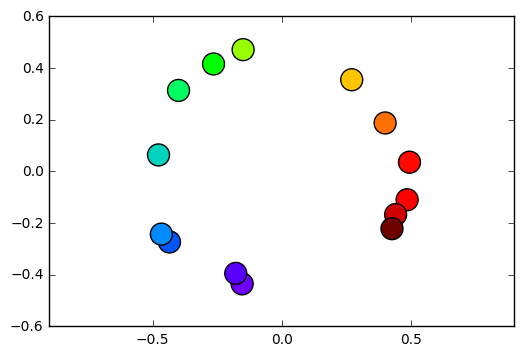

In [5]:
plt.scatter(color_pos[:,0],color_pos[:,1],c=color_label,s=250)
plt.axis('equal');

As you can see, CIELAB space places similar colours close to each other. We can use this psychological space to determine precisely how similar each colour is to every other color. The goal is to use Shepard's Law of Generalization to make predictions about these similarities. 

Let's start with determining the distances separating the colours.

In [6]:
def euclidean_distance(color1,color2):
    # ADD YOUR CODE HERE
    xdiff = color1[0]-color2[0]
    ydiff = color1[1]-color2[1]
    xdiffsquared = xdiff**2
    ydiffsquared = ydiff**2
    sumsquared = xdiffsquared+ydiffsquared
    dist = sumsquared**0.5
    return dist

In [7]:
color_dists = np.zeros((14,14))
for c1 in range(0,14):
    for c2 in range(0,14):
        color_dists[c1][c2] = euclidean_distance(color_pos[c1],color_pos[c2])

## Comparing model predictions to human colour similarity data
As a final step, we can assess the predictions of the model by comparing it to human similarity ratings for these 14 colours. Below, you'll find similarity data from a study published long ago (Ekman, 1954, Dimensions of Color Vision, Journal of Psychology). Each value corresponds to the probability that human participants labeled two colours as the same. 

In [8]:
rating_sims = np.array([[1.00,0.74,0.36,0.26,0.16,0.06,0.06,0.05,0.04,0.07,0.07,0.11,0.15,0.12,],
                        [0.74,1.00,0.30,0.33,0.15,0.09,0.04,0.05,0.04,0.05,0.06,0.07,0.08,0.11,],
                        [0.36,0.30,1.00,0.68,0.22,0.13,0.09,0.06,0.03,0.03,0.03,0.03,0.04,0.05,],
                        [0.26,0.33,0.68,1.00,0.33,0.18,0.11,0.08,0.04,0.03,0.04,0.02,0.04,0.06,],
                        [0.16,0.15,0.22,0.33,1.00,0.49,0.24,0.22,0.07,0.04,0.03,0.03,0.04,0.04,],
                        [0.06,0.09,0.13,0.18,0.49,1.00,0.70,0.33,0.10,0.05,0.03,0.03,0.03,0.03,],
                        [0.06,0.04,0.09,0.11,0.24,0.70,1.00,0.79,0.15,0.07,0.05,0.04,0.04,0.03,],
                        [0.05,0.05,0.06,0.08,0.22,0.33,0.79,1.00,0.28,0.11,0.06,0.05,0.04,0.05,],
                        [0.04,0.04,0.03,0.04,0.07,0.10,0.15,0.28,1.00,0.55,0.24,0.15,0.15,0.11,],
                        [0.07,0.05,0.03,0.03,0.04,0.05,0.07,0.11,0.55,1.00,0.70,0.41,0.49,0.22,],
                        [0.07,0.06,0.03,0.04,0.03,0.03,0.05,0.06,0.24,0.70,1.00,0.71,0.50,0.33,],
                        [0.11,0.07,0.03,0.02,0.03,0.03,0.04,0.05,0.15,0.41,0.71,1.00,0.77,0.69,],
                        [0.15,0.08,0.04,0.04,0.04,0.03,0.04,0.04,0.15,0.49,0.50,0.77,1.00,0.95,],
                        [0.12,0.11,0.05,0.06,0.04,0.03,0.03,0.05,0.11,0.22,0.33,0.69,0.95,1.00]])

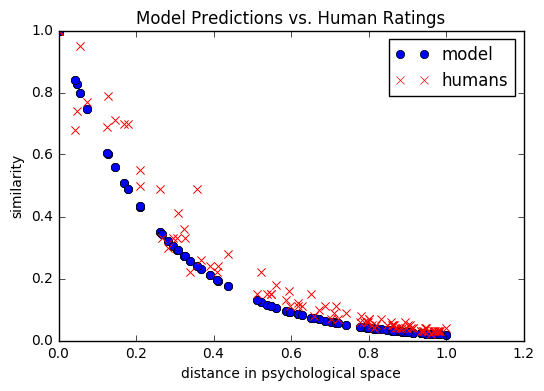

In [21]:
# ADD CODE HERE
c = 4 # change the scaling parameter to see how it affects the model similarity predictions
color_sims = np.exp(-c*color_dists) # rewrite the exponential function to include the scaling parameter c

# replot the model predictions and human data
plt.plot(color_dists.ravel(),color_sims.ravel(),'bo')
plt.plot(color_dists.ravel(),rating_sims.ravel(),'rx')
plt.xlabel('distance in psychological space')
plt.ylabel('similarity')
plt.title('Model Predictions vs. Human Ratings')
plt.legend(['model','humans']);

In [22]:
# test a range of c parameter values from 0-8 with a step size of 0.01
rmse = []
allc = np.arange(0,8,0.01)
for c in allc:
    color_sims = np.exp(-c*color_dists)
    rmse.append(np.mean((color_sims.ravel()-rating_sims.ravel())**2)**0.5)

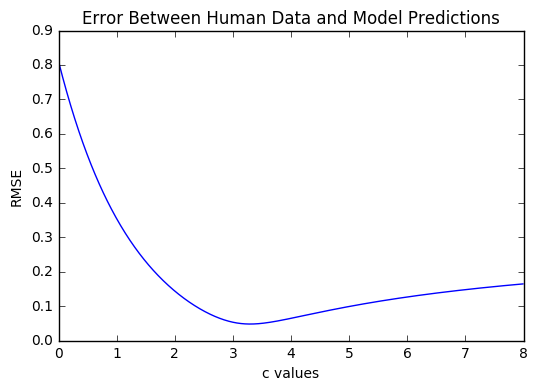

In [23]:
plt.plot(allc,rmse)
plt.xlabel('c values')
plt.ylabel('RMSE')
plt.title('Error Between Human Data and Model Predictions');

In [24]:
min_rmse = np.min(rmse)
min_c = allc[np.argmin(rmse)]
print min_c, min_rmse

3.3 0.0478004189164
